<a href="https://colab.research.google.com/github/complyservice/Data-science/blob/main/Ibge%2B_idh_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formulario de escolha do municipio

In [30]:
import pandas as pd
import random
import requests

In [31]:
RA = 950219#@param {type:'integer'}
random.seed(RA)
codigo = random.randint(0,644)
print('O codigo do municipio e ',codigo)

O codigo do municipio e  333


In [32]:
districts = requests.get("https://servicodados.ibge.gov.br/api/v1/localidades/estados/35/municipios").json()
districts_sp = [municipios["nome"] for municipios in districts]
districts_id = [municipios["id"] for municipios in districts]
data_sp = pd.DataFrame.from_dict({'ID':districts_id,'Municípios':districts_sp})
data_sp

,ID,Municípios
0,3500105,Adamantina
1,3500204,Adolfo
2,3500303,Aguaí
3,3500402,Águas da Prata
4,3500501,Águas de Lindóia
...,...,...
640,3557006,Votorantim
641,3557105,Votuporanga
642,3557154,Zacarias
643,3557204,Chavantes


In [33]:
districts_sp = [municipios['nome']for municipios in districts]
districts_id = [municipios['id'] for municipios in districts]
data_sp = pd.DataFrame.from_dict({'ID':districts_id,'Municipios':districts_sp})
data_sp

,ID,Municipios
0,3500105,Adamantina
1,3500204,Adolfo
2,3500303,Aguaí
3,3500402,Águas da Prata
4,3500501,Águas de Lindóia
...,...,...
640,3557006,Votorantim
641,3557105,Votuporanga
642,3557154,Zacarias
643,3557204,Chavantes


In [34]:
print('Municipios a ser analisado ',data_sp.iloc[codigo,:])

Municipios a ser analisado  ID              3529658
Municipios    Mesópolis
Name: 333, dtype: object


In [35]:
url = "https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html"
d = pd.read_html(url)
idh = d[0]
idh 

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,São Caetano do Sul (SP),862,0891,0887,811
1,2 º,Águas de São Pedro (SP),854,0849,0890,825
2,3 º,Florianópolis (SC),847,0870,0873,800
3,4 º,Balneário Camboriú (SC),845,0854,0894,789
4,4 º,Vitória (ES),845,0876,0855,805
...,...,...,...,...,...,...
5560,5560 º,Uiramutã (RR),453,0439,0766,276
5561,5562 º,Marajá do Sena (MA),452,0400,0774,299
5562,5563 º,Atalaia do Norte (AM),450,0481,0733,259
5563,5564 º,Fernando Falcão (MA),443,0417,0728,286


In [36]:
print(idh.columns.ravel())
idh = idh[idh['Município'].str.contains("(SP)")]
idh

['Ranking IDHM 2010' 'Município' 'IDHM 2010' 'IDHM Renda 2010'
 'IDHM Longevidade 2010' 'IDHM Educação 2010']


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,São Caetano do Sul (SP),862,0891,0887,811
1,2 º,Águas de São Pedro (SP),854,0849,0890,825
5,6 º,Santos (SP),840,0861,0852,807
10,11 º,Jundiaí (SP),822,0834,0866,768
11,12 º,Valinhos (SP),819,0848,0850,763
...,...,...,...,...,...,...
2967,2964 º,Redenção da Serra (SP),657,0633,0799,560
3013,3008 º,Natividade da Serra (SP),655,0664,0814,520
3098,3090 º,Nova Campina (SP),651,0598,0799,577
3275,3275 º,Barra do Turvo (SP),641,0625,0792,532


In [37]:
print(idh.columns.ravel())
idh['Município'] = idh['Município'].str[:-5]
idh

['Ranking IDHM 2010' 'Município' 'IDHM 2010' 'IDHM Renda 2010'
 'IDHM Longevidade 2010' 'IDHM Educação 2010']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,São Caetano do Sul,862,0891,0887,811
1,2 º,Águas de São Pedro,854,0849,0890,825
5,6 º,Santos,840,0861,0852,807
10,11 º,Jundiaí,822,0834,0866,768
11,12 º,Valinhos,819,0848,0850,763
...,...,...,...,...,...,...
2967,2964 º,Redenção da Serra,657,0633,0799,560
3013,3008 º,Natividade da Serra,655,0664,0814,520
3098,3090 º,Nova Campina,651,0598,0799,577
3275,3275 º,Barra do Turvo,641,0625,0792,532


In [38]:
final_data = pd.merge(left = data_sp, right = idh, left_on = 'Municipios', right_on = 'Município', how = "outer")
final_data

,ID,Municipios,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,3500105.0,Adamantina,67 º,Adamantina,790.0,0772,0852,750.0
1,3500204.0,Adolfo,1021 º,Adolfo,730.0,0710,0844,648.0
2,3500303.0,Aguaí,1454 º,Aguaí,715.0,0703,0858,606.0
3,3500402.0,Águas da Prata,119 º,Águas da Prata,781.0,0750,0886,716.0
4,3500501.0,Águas de Lindóia,648 º,Águas de Lindóia,745.0,0725,0846,675.0
...,...,...,...,...,...,...,...,...
653,NaN,NaN,1266 º,Aparecida D'Oeste,721.0,0697,0804,670.0
654,NaN,NaN,1514 º,Florínia,713.0,0678,0820,652.0
655,NaN,NaN,1546 º,Biritiba-Mirim,712.0,0710,0795,640.0
656,NaN,NaN,1995 º,São Luís do Paraitinga,697.0,0691,0826,593.0


In [39]:
dfinal = final_data.dropna()
dfinal


,ID,Municipios,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,3500105.0,Adamantina,67 º,Adamantina,790.0,0772,0852,750.0
1,3500204.0,Adolfo,1021 º,Adolfo,730.0,0710,0844,648.0
2,3500303.0,Aguaí,1454 º,Aguaí,715.0,0703,0858,606.0
3,3500402.0,Águas da Prata,119 º,Águas da Prata,781.0,0750,0886,716.0
4,3500501.0,Águas de Lindóia,648 º,Águas de Lindóia,745.0,0725,0846,675.0
...,...,...,...,...,...,...,...,...
640,3557006.0,Votorantim,265 º,Votorantim,767.0,0720,0838,747.0
641,3557105.0,Votuporanga,67 º,Votuporanga,790.0,0772,0857,744.0
642,3557154.0,Zacarias,1052 º,Zacarias,729.0,0695,0826,674.0
643,3557204.0,Chavantes,1052 º,Chavantes,729.0,0713,0828,655.0


In [40]:
dfinal.columns
dfinal['IDHM 2010']

0      790.0
1      730.0
2      715.0
3      781.0
4      745.0
       ...  
640    767.0
641    790.0
642    729.0
643    729.0
644    740.0
Name: IDHM 2010, Length: 632, dtype: float64

In [41]:
tabhtml = dfinal.to_html()
text_file = open("index.html","w")
text_file.write(tabhtml)
text_file.close()
!ls

index.html  sample_data


In [43]:
from google.colab import files
files.download('index.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nomes das colunas  Index(['ID', 'Municipios', 'Ranking IDHM 2010', 'Município', 'IDHM 2010',
       'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010'],
      dtype='object')
Valores da coluna IDHM 2010:  0      790.0
1      730.0
2      715.0
3      781.0
4      745.0
       ...  
640    767.0
641    790.0
642    729.0
643    729.0
644    740.0
Name: IDHM 2010, Length: 632, dtype: float64
Tipo do elemento de IDHM 2010 <class 'numpy.float64'>


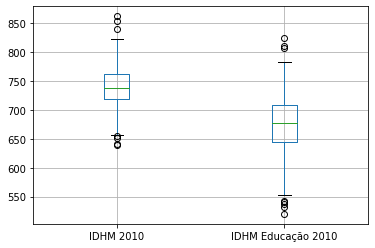

In [46]:
print("Nomes das colunas ", dfinal.columns)
print("Valores da coluna IDHM 2010: ", dfinal['IDHM 2010'])
print("Tipo do elemento de IDHM 2010",type(dfinal['IDHM 2010'][0]))
boxplot = dfinal.boxplot(column=['IDHM 2010','IDHM Educação 2010'])

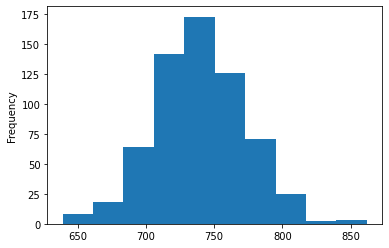

In [47]:
dfinal['IDHM 2010'].plot.hist(orientation='vertical', cumulative=False)
#dfinal['IDHM 2010'].plot.hist(orientation='horizontal',cumulative=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0d3b86b90>,
      dtype=object)

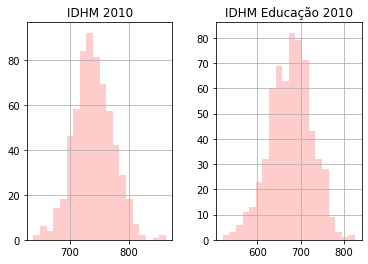

In [49]:
dfinal.hist(column=['IDHM 2010','IDHM Educação 2010'],color='r', alpha=0.2, bins=20)

In [50]:
dfinal['IDHM Renda 2010'] = pd.to_numeric(dfinal['IDHM Renda 2010'])
dfinal['IDHM Longevidade 2010'] = pd.to_numeric(dfinal['IDHM Longevidade 2010'])
dfinal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Municipios,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,3500105.0,Adamantina,67 º,Adamantina,790.0,772,852,750.0
1,3500204.0,Adolfo,1021 º,Adolfo,730.0,710,844,648.0
2,3500303.0,Aguaí,1454 º,Aguaí,715.0,703,858,606.0
3,3500402.0,Águas da Prata,119 º,Águas da Prata,781.0,750,886,716.0
4,3500501.0,Águas de Lindóia,648 º,Águas de Lindóia,745.0,725,846,675.0
...,...,...,...,...,...,...,...,...
640,3557006.0,Votorantim,265 º,Votorantim,767.0,720,838,747.0
641,3557105.0,Votuporanga,67 º,Votuporanga,790.0,772,857,744.0
642,3557154.0,Zacarias,1052 º,Zacarias,729.0,695,826,674.0
643,3557204.0,Chavantes,1052 º,Chavantes,729.0,713,828,655.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0d2cb4490>,
      dtype=object)

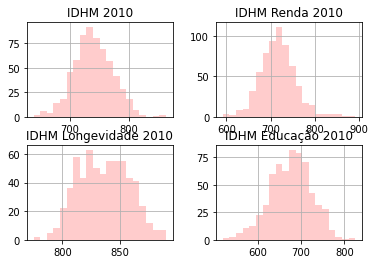

In [51]:
dfinal.hist(column=['IDHM 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010'],color='r', alpha=0.2, bins=20)